In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2_contingency, f_oneway
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
path = "Residential_Sales_Data.csv"
RSD = pd.read_table(path, sep=',')

In [3]:
RSD.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Age Decade Squared,Lot Size Squared,Improvement Size Squared,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Square root of lot size,Square root of age,Square root of improvement size,Town and Neighborhood
0,17273100931118,299,40,365398.0,76,NaN,NaN,NaN,NaN,NaN,...,19.36,1.335157e+11,NaN,1,NaN,40,604.481596,6.633250,NaN,7640
1,18013090421010,299,52,19551.0,21,NaN,NaN,NaN,NaN,NaN,...,32.49,3.822416e+08,NaN,1,NaN,52,139.824890,7.549834,NaN,2152
2,16094150130000,211,13,4500.0,77,3.0,6.0,2.0,2.0,24.0,...,75.69,2.025000e+07,55279225.0,1,1.0,13,67.082039,9.327379,86.226446,7713
3,12253140491007,299,80,12148.0,20,NaN,NaN,NaN,NaN,NaN,...,6.76,1.475739e+08,NaN,1,NaN,80,110.217966,5.099020,NaN,2080
4,12111190201042,299,390,48470.0,71,NaN,NaN,NaN,NaN,NaN,...,20.25,2.349341e+09,NaN,1,NaN,390,220.159033,6.708204,NaN,71390


In [4]:
RSD.shape

(583370, 83)

In [5]:
RSD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583370 entries, 0 to 583369
Data columns (total 83 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PIN                                  583370 non-null  int64  
 1   Property Class                       583370 non-null  int64  
 2   Neighborhood Code                    583370 non-null  int64  
 3   Land Square Feet                     583370 non-null  float64
 4   Town Code                            583370 non-null  int64  
 5   Type of Residence                    410156 non-null  float64
 6   Apartments                           410157 non-null  float64
 7   Wall Material                        410156 non-null  float64
 8   Roof Material                        410156 non-null  float64
 9   Rooms                                410156 non-null  float64
 10  Bedrooms                             410156 non-null  float64
 11  Basement     

In [6]:
RSD.describe()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,...,Age Decade Squared,Lot Size Squared,Improvement Size Squared,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Square root of lot size,Square root of age,Square root of improvement size,Town and Neighborhood
count,5.833700e+05,583370.000000,583370.000000,5.833700e+05,583370.000000,410156.000000,410157.000000,410156.000000,410156.000000,410156.000000,...,583370.000000,5.833700e+05,4.101570e+05,583370.000000,410157.000000,583370.000000,583370.000000,583370.000000,410157.000000,583370.000000
mean,1.594551e+13,242.962891,100.447214,5.681932e+04,49.699388,2.119150,0.442684,1.932484,1.180592,7.174855,...,48.998287,5.901535e+10,4.508064e+06,0.818067,0.824618,100.447214,139.361005,7.442808,41.399761,22596.957662
std,7.447628e+12,43.717294,97.291263,2.361927e+05,24.130051,1.273729,1.098950,0.771985,0.631256,3.518249,...,46.218085,5.447767e+11,8.065406e+06,0.385789,0.380294,97.291263,193.385351,2.401553,10.713765,27610.065511
min,1.011000e+12,202.000000,10.000000,0.000000e+00,10.000000,1.000000,-5.000000,1.000000,1.000000,2.000000,...,0.010000,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,1011.000000
25%,1.201105e+13,203.000000,31.000000,3.780000e+03,27.000000,1.000000,0.000000,1.000000,1.000000,5.000000,...,13.690000,1.428840e+07,1.272384e+06,1.000000,1.000000,31.000000,61.481705,6.082763,33.585711,3160.000000
50%,1.528307e+13,211.000000,71.000000,6.550000e+03,70.000000,2.000000,0.000000,2.000000,1.000000,6.000000,...,33.640000,4.290250e+07,2.202256e+06,1.000000,1.000000,71.000000,80.932070,7.615773,38.522721,7381.000000
75%,2.017303e+13,299.000000,130.000000,1.290000e+04,72.000000,2.000000,0.000000,2.000000,1.000000,8.000000,...,81.000000,1.664100e+08,4.866436e+06,1.000000,1.000000,130.000000,113.578167,9.486833,46.968074,35112.000000
max,3.332302e+13,299.000000,600.000000,3.713027e+06,77.000000,8.000000,6.000000,4.000000,6.000000,241.000000,...,396.010000,1.378657e+13,5.716403e+08,1.000000,1.000000,600.000000,1926.921638,14.106736,154.625354,77170.000000


****(1). Determine which data to keep****

***1.1 Vairbales that have problems when entering the value***

In [7]:
# Drop variable "Other Improvements" because the way they entered makes it impossible to distinguish between a 1 & 2 and a 12. Therefore, useless.
# large Lot contains no value, therefore drop.
# Drop variable "Condition, Desirability and Utility" as this field does not match across the SQL server/AS-400 for 2018.
RSD = RSD.drop(columns = ['Other Improvements','Large Lot','Condition, Desirability and Utility'])


***1.2 Variables with too many missing value***

In [8]:
for column in RSD.columns:
    print(f"{column}: {RSD[column].isnull().sum()}")

PIN: 0
Property Class: 0
Neighborhood Code: 0
Land Square Feet: 0
Town Code: 0
Type of Residence: 173214
Apartments: 173213
Wall Material: 173214
Roof Material: 173214
Rooms: 173214
Bedrooms: 173214
Basement: 173214
Basement Finish: 173216
Central Heating: 173213
Other Heating: 173213
Central Air: 173213
Fireplaces: 173213
Attic Type: 173213
Attic Finish: 0
Half Baths: 173213
Design Plan: 173213
Cathedral Ceiling: 173213
Construction Quality: 173214
Renovation: 582570
Site Desirability: 173214
Garage 1 Size: 173213
Garage 1 Material: 173213
Garage 1 Attachment: 173213
Garage 1 Area: 173213
Garage 2 Size: 173213
Garage 2 Material: 173213
Garage 2 Attachment: 173213
Garage 2 Area: 173213
Porch: 0
Building Square Feet: 173213
Repair Condition: 173214
Multi Code: 173213
Number of Commercial Units: 173213
Estimate (Land): 0
Estimate (Building): 0
Sale Date: 0
Deed No.: 0
Sale Price: 0
Longitude: 7552
Latitude: 7552
Census Tract: 7552
Total Building Square Feet: 574879
Multi Property Indicat

***1.2.1 Variables that have more than 30% missing values***

variable "Renovation", 582570 missing values. 1 for yes, 0 for no. Drop it as too many missing values.

However, for those with too many missing values, we still not to look carefully to see whether there is a valid reason for the missing.

Therefore, further check the following variables:

"Total Building Square Feet", 574879 missing values.

"Number of Units": 410156 missing values.

"Percent Ownership": 408933 missing values.

"Condo Class Factor": 410156 missing values.

"Multi-Family Indicator": 512140 missing values.

"Condo Strata": 544256 missing values.

In [9]:
# variable "Total Building Square Feet" applies to condominium properties (299) only. 
# It is the sum of interior square feet of all units in the building.
missing_sqrft = RSD[RSD['Total Building Square Feet'].isna()]
sqrft_check = missing_sqrft[missing_sqrft['Property Class'].isin([299])]
count_sqrft = sqrft_check.shape[0]
count_condo = RSD['Property Class'].isin([299]).sum()
print("Missing total building square feet:",count_sqrft, "Condos:",count_condo)
# It is all missing when property class is 299.

Missing total building square feet: 173214 Condos: 173214


In [10]:
# "Number of Units" is the number of units in a building only for condos.
missing_numcondo = RSD[RSD['Number of Units'].isna()]
numcondo_check = missing_numcondo[missing_numcondo['Property Class'].isin([299])]
count_numcondo = numcondo_check.shape[0]
count_condo = RSD['Property Class'].isin([299]).sum()
print("Missing number of units:",count_numcondo, "Condos:",count_condo)
# There is actually no missing value when property class is condo.

Missing number of units: 0 Condos: 173214


In [11]:
# variable "Percent Ownership" is the percent of ownership of a condo building .
missing_pctown = RSD[RSD['Percent Ownership'].isna()]
pctown_check = missing_pctown[missing_pctown['Property Class'].isin([299])]
count_pctown = pctown_check.shape[0]
count_condo = RSD['Property Class'].isin([299]).sum()
print("Missing percent ownership:",count_numcondo, "Condos:",count_condo)
# There is actually no missing value when property class is condo.

Missing percent ownership: 0 Condos: 173214


In [12]:
# For "Condo Class Factor", it is coded only for "NCHARS" modeling group. Properties with class 200, 201, 241, 299 is defined as "NCHARS", 
# short for "no characteristics", which are condos and vacant land classes.
# (It is defined in the variable "Modeling Group").
missing_condo_cls_fctr = RSD[RSD['Condo Class Factor'].isna()]
condo_cls_fctr_check = missing_condo_cls_fctr[missing_condo_cls_fctr['Property Class'].isin([200,201,241,299])]
count_condo_cls_fctr_check = condo_cls_fctr_check.shape[0]
count_condo = RSD['Property Class'].isin([200,201,241,299]).sum()
print("Missing condo class factor:",count_condo_cls_fctr_check, "Condos and Vacant:",count_condo)
# No missing value in "NCHARS" group.

Missing condo class factor: 0 Condos and Vacant: 173214


In [13]:
# For "Multi-Family Indicator", it is coded only for "MF" modeling group. Properties with class 211 and 212 are "MF", short for "multi-family."
# (It is defined in the variable "Modeling Group").
missing_multifam = RSD[RSD['Multi-Family Indicator'].isna()]
multifam_check = missing_multifam[missing_multifam['Property Class'].isin([211,212])]
count_multifam_check = multifam_check.shape[0]
count_MF = RSD['Property Class'].isin([211, 212]).sum()
print("Missing MF:",count_multifam_check,"MF:",count_MF)
# No missing value when in MF group.

Missing MF: 0 MF: 71230


In [14]:
# As "Condo Strata" shows the decile of mean unit market value a condominimum building is,
missing_condo_strata = RSD[RSD['Condo Strata'].isna()]
condo_strats_check = missing_condo_strata[missing_condo_strata['Property Class'].isin([299])]
count_condo_strats_check = condo_strats_check.shape[0]
count_condominimum = RSD['Property Class'].isin([299]).sum()
print("Missing condo strata:",count_condo_strats_check, "Condominimum type:",count_condominimum)
# There is 173214 for condominimum building but 134100 is missing (which are too many).

Missing condo strata: 134100 Condominimum type: 173214


In [15]:
RSD = RSD.drop(columns = ['Renovation','Total Building Square Feet','Condo Strata'])

***1.2.2 Variables that have almost 30% of missing values***

In [16]:
# As many variables have the same missing values, check whether they are missing at the same time
# Here we use Building Square Feet as reference to see how many missing values are there in other variables when Building Square Feet is also missing. 
check = ['Type of Residence','Apartments','Wall Material','Roof Material','Rooms','Bedrooms','Basement','Basement Finish','Central Heating',
         'Other Heating','Central Air','Fireplaces','Attic Type','Half Baths','Design Plan','Cathedral Ceiling','Construction Quality', 
         'Site Desirability','Garage 1 Size','Garage 1 Material','Garage 1 Attachment','Garage 1 Area','Garage 2 Size',
         'Garage 2 Material','Garage 2 Attachment','Garage 2 Area','Repair Condition','Multi Code','Number of Commercial Units', 
         'Full Baths','Multi-Family Indicator','Improvement Size Squared','Garage Indicator','Square root of improvement size']

missing_counts = {}

for i in check:
    missing_both = RSD[RSD['Building Square Feet'].isna() & RSD[i].isna()].shape[0]
    missing_counts[i] = missing_both

missing_summary = pd.DataFrame(list(missing_counts.items()), columns=['Variable', 'MissingCount'])

print(missing_summary)
# Those variables all have 173213 missing values at the same time when Building Square Feet has a missing value.
# As it is similar to the total missing value of each variable, we could conclude they are all missing at the same time
# Therefore, we need to further explore the reason why they are missing at the same time

                           Variable  MissingCount
0                 Type of Residence        173213
1                        Apartments        173213
2                     Wall Material        173213
3                     Roof Material        173213
4                             Rooms        173213
5                          Bedrooms        173213
6                          Basement        173213
7                   Basement Finish        173213
8                   Central Heating        173213
9                     Other Heating        173213
10                      Central Air        173213
11                       Fireplaces        173213
12                       Attic Type        173213
13                       Half Baths        173213
14                      Design Plan        173213
15                Cathedral Ceiling        173213
16             Construction Quality        173213
17                Site Desirability        173213
18                    Garage 1 Size        173213


In [17]:
# Our guess of the reason that there is missing value simultaneously is that is due to property class of condo.
# Below we examin our guess by seeing how many is missing when property class is 299.
condo_tf = ['Type of Residence','Apartments','Wall Material','Roof Material','Rooms','Bedrooms','Basement','Basement Finish','Central Heating',
         'Other Heating','Central Air','Fireplaces','Attic Type','Half Baths','Design Plan','Cathedral Ceiling','Construction Quality', 
         'Site Desirability','Garage 1 Size','Garage 1 Material','Garage 1 Attachment','Garage 1 Area','Garage 2 Size',
         'Garage 2 Material','Garage 2 Attachment','Garage 2 Area','Repair Condition','Multi Code','Number of Commercial Units', 
         'Full Baths','Multi-Family Indicator','Improvement Size Squared','Garage Indicator',
         'Square root of improvement size']

missing_cause = {}

for j in condo_tf:
    missing_in = RSD[RSD[j].isna() & (RSD['Property Class'] == 299)]
    missing_cause[j] = missing_in.shape[0]

missing_cause_df = pd.DataFrame(list(missing_cause.items()), columns=['Variable', 'Missing in Condo'])

print(missing_cause_df)
# Here we ensure that the reason is because of property class condo.

                           Variable  Missing in Condo
0                 Type of Residence            173214
1                        Apartments            173213
2                     Wall Material            173214
3                     Roof Material            173214
4                             Rooms            173214
5                          Bedrooms            173214
6                          Basement            173214
7                   Basement Finish            173214
8                   Central Heating            173213
9                     Other Heating            173213
10                      Central Air            173213
11                       Fireplaces            173213
12                       Attic Type            173213
13                       Half Baths            173213
14                      Design Plan            173213
15                Cathedral Ceiling            173213
16             Construction Quality            173214
17                Site Desir

In [18]:
# After all, we determine that "Property Class" 299 should be dropped;
# As 'Number of Units','Percent Ownership','Condo Class Factor','Multi-Family Indicator' only apply to certain type of housing
# and there is no way to impute those missing values, we drop those variables.
RSD = RSD[RSD['Property Class'] != 299]
RSD = RSD.drop(columns = ['Number of Units','Percent Ownership','Condo Class Factor','Multi-Family Indicator'])

***1.3 Variables that can be represent by others***

In [19]:
# examine whether neighborhood code is unique across towns
duplicates = RSD.duplicated(subset=['Town Code', 'Neighborhood Code'], keep=False)
print(RSD[duplicates])
# we find that "Neighborhood Code" cannot replace "Town Code", they need to be together to identify a unique address.

                   PIN  Property Class  Neighborhood Code  Land Square Feet  \
2       16094150130000             211                 13            4500.0   
5        4252000820000             204                100           33898.0   
8       14322110150000             208                 12            3720.0   
9       27021200080000             204                 34           16079.0   
10       1191010060000             204                 21          220766.0   
...                ...             ...                ...               ...   
583357  15292270020000             203                104            8267.0   
583360  20203200240000             234                171            3125.0   
583366  20021110150000             205                 10            2750.0   
583367  20021110150000             205                 10            2750.0   
583368  14302231400000             278                200            3068.0   

        Town Code  Type of Residence  Apartments  W

In [20]:
# can drop variable "Property Class" (299, 208, 204, 203, 205, 211, 234, 206, 278, 202, 295, 210, 212, 209, 207),
# as it is more clearly classified in variable "Modeling Group".

# drop variable "Longitude", "Latitude", "Census Tract","Property Address", "Neigborhood Code (mapping)", "Town and Neighborhood",
# as we already have "Neighborhood Code" and "Town Code" that can represent.
# We drop "Town and Neighborhood" town code and neighborhhod code cannot be differentiate clearlly in variable "Town and Neighborhood".
# Will use "Neighborhood Code" and "Town Code" to construct new address variable later

# drop variable "Sale Year", "Sale Half-Year","Sale Quarter","Sale Month of Year","Sale Half of Year","Most Recent Sale","Sale Date"
# as variable "Sale Quarter of Year" can already represent date from 2013-2019 year and housing price is affected by quarter and year.

# drop variable "Age Squared", "Age Decade Squared", "Square root of age", "Age Decade", as "Age" can represent.

# drop variable "Deed No." as it is used to track transation which does not affect price.

# drop variable "Square root of lot size" as "Lot Size Squared" can represent.

# drop variable "Square root of improvement size" as "Improvement Size Squared" can represent.

RSD = RSD.drop(columns = ["Property Class","Longitude","Latitude","Census Tract","Property Address","Neigborhood Code (mapping)",
                          "Town and Neighborhood","Sale Year", "Sale Half-Year","Sale Quarter","Sale Month of Year","Sale Half of Year",
                          "Most Recent Sale","Sale Date","Age Squared", "Age Decade Squared", "Age Decade", "Square root of age","Deed No.",
                          "Square root of lot size","Square root of improvement size"])

In [21]:
RSD.shape

(410156, 52)

****(2). Identify unusual values****

****Transform categorical values into numerical values****

In [22]:
for col in RSD.columns:
    print(col,"....",RSD[col].unique())

PIN .... [16094150130000  4252000820000 14322110150000 ... 31111100040000
 28041130320000 15292270020000]
Neighborhood Code .... [ 13 100  12  34  21  42  40  30  90  81  70 142  80 440 345 330 271  10
 111  91 101 282 402 120  50 310 430  31 180 321 171  72 270  32  11  51
 260  85 423  20  92  15 102 151  67 165  82 141 380  94 420  71 461 210
 314  52 110 191 200  60 221 320  14 181 240 150 211 160 371 300 220 162
  33  23 103 362 121 361  83  22 422  41 130 251 170 115  74  84  19 132
 114 390  65  55 161 280 193 185 410 223  54  44 140  93  73 194  39 112
 281 190 212  61 143 350 312 116  36  62 250 463 131 520  46  24 226  47
 104 323 152  53 109 230 122  56  35 174 431 293  27 360 274 560  25 316
 164 133 192  45 108  43  87  63  75 262 222 241 107 183  64  88  99 224
 201 232 175 113 134 340 182  26 163 173 255  18 341  37 117 227 432 400
 166 342  86 600  48 257 315 344 290 106  96 105  95 580 145  38 275]
Land Square Feet .... [ 4500.         33898.          3720.         ...

In [23]:
count_fb42 = (RSD['Full Baths'] == 42).sum()
count_fb42

1

In [24]:
# Full bath 42 is suspecious and only one equals it, therefore drop it as it is clearly mistaken
RSD = RSD[RSD['Full Baths'] != 42]

In [25]:
# There are some values that should not appeared according to the codebook.
# We first check how many of unusual values there are to determine whether to drop the variable, 
# or to treat these unusual values as missing values and assign them new values.

# Apartments should not include value -5 according to codebook
numA = (RSD['Apartments'] == -5).sum()
print("Unusual for Apartments:",numA)

# Central heating does not include value 0 according to codebook
numCH = (RSD['Central Heating'] == 0).sum()
print("Unusual for Central Heating:",numCH)

# Design Plan does not include value 0 according to codebook
numDP = (RSD['Design Plan'] == 0).sum()
print("Unusual for Design Plan:",numDP)

# Cathedral Ceiling does not include value 0 according to codebook
numCC = (RSD['Cathedral Ceiling'] == 0).sum()
print("Unusual for Cathedral Ceiling:",numCC)

# Attic Finish does not include value 0 according to codebook
numatic = (RSD['Attic Finish'] == 0).sum()
print("Unusual for Attic Finish:",numatic)

# Garage 1 Size should not include 0 according to codebook
g1s = (RSD['Garage 1 Size'] == 0).sum()
print("Unusual for Garage 1 Size:",g1s)

# Garage 1 Material should not include 0 according to codebook
g1m = (RSD['Garage 1 Material'] == 0).sum()
print("Unusual for Garage 1 Material:",g1m)

# Garage 1 Attachment should not include 0 according to codebook
g1atch = (RSD['Garage 1 Attachment'] == 0).sum()
print("Unusual for Garage 1 Attachment:",g1atch)

# Garage 1 Area should not include 0 according to codebook
g1area = (RSD['Garage 1 Area'] == 0).sum()
print("Unusual for Garage 1 Area:",g1area)

# Garage 2 Material should not include 0 according to codebook
g2m = (RSD['Garage 2 Material'] == 0).sum()
print("Unusual for Garage 2 Material:",g1m)

# Garage 2 Attachment should not include 0 according to codebook
g2atch = (RSD['Garage 2 Attachment'] == 0).sum()
print("Unusual for Garage 2 Attachment:",g1atch)

# Garage 2 Area should not include 0 according to codebook
g2area = (RSD['Garage 2 Area'] == 0).sum()
print("Unusual for Garage 2 Area:",g1area)

Unusual for Apartments: 28
Unusual for Central Heating: 1321
Unusual for Design Plan: 116718
Unusual for Cathedral Ceiling: 220565
Unusual for Attic Finish: 276400
Unusual for Garage 1 Size: 71933
Unusual for Garage 1 Material: 71930
Unusual for Garage 1 Attachment: 71923
Unusual for Garage 1 Area: 71925
Unusual for Garage 2 Material: 71930
Unusual for Garage 2 Attachment: 71923
Unusual for Garage 2 Area: 71925


In [26]:
# drop variable "Design Plan","Cathedral Ceiling","Garage 1 Size","Garage 1 Material","Garage 1 Attachment","Garage  Area","Attic Finish","Garage 2 Material",
# "Garage 2 Attachment","Garage 2 Area".
# As those variables contain too much value "0" that cannot be explained in the codebook.
RSD = RSD.drop(columns = ["Design Plan","Cathedral Ceiling","Garage 1 Size","Garage 1 Material","Garage 1 Attachment","Garage 1 Area","Attic Finish",
                          "Garage 2 Material","Garage 2 Attachment","Garage 2 Area"])

In [27]:
# treat -5 in "Apartments" (numer of apartments) as missing value 
# and reassign them using the mode of the values within the same variable "Bedrooms".
RSD['Apartments'].replace(-5, np.nan, inplace=True)
RSD['Apartments'] = RSD.groupby(['Bedrooms'])['Apartments'].transform(lambda x: x.fillna(x.mode()[0]))

# treat 0 in Central heating (a categorical variable) as missing value 
# and impute it with mode of the values within the same variable "Neighborhood Code" and "Town Code".
RSD['Central Heating'].replace(0, np.nan, inplace=True)
RSD['Central Heating'] = RSD.groupby(['Neighborhood Code', 'Town Code'])['Central Heating'].transform(lambda x: x.fillna(x.mode()[0]))

In [28]:
# Garage 2 size - 1 = 1 car, 2 = 1.5 car, 3 = 2 car, 4 = 2.5 cars, 5 = 3 cars, 6 = 3.5 cars, 7 = none
RSD['Garage 2 Size'] = RSD['Garage 2 Size'].replace({2: 1.5, 3: 2, 4: 2.5, 5: 3, 6: 3.5, 7: 0})

In [29]:
# Multi Code indicates that how many more building exists on the PIN. Originally, 2=one more building, 3=two more, etc.
# Change into 1=one more building, etc.
RSD['Multi Code'] = RSD['Multi Code'].apply(lambda x: x - 1)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price+1)'}>]], dtype=object)

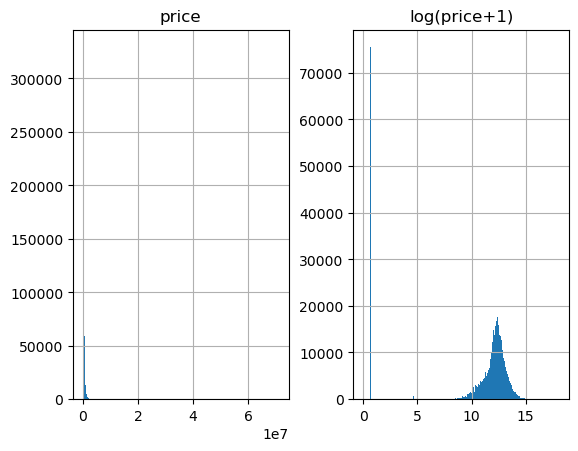

In [30]:
%matplotlib inline
prices=pd.DataFrame({"price":RSD["Sale Price"],"log(price+1)":np.log1p(RSD["Sale Price"])})
prices.hist(bins=200)

In [31]:
price_check=RSD[(RSD['Sale Price'] == 0) | (RSD['Sale Price'] == 1)].shape[0]
price_check

76541

In [32]:
# here we can see that sale price is wired not becuase it is in certain class or in certain category
summary_p = RSD[(RSD['Sale Price'] > 0) & (RSD['Sale Price'] < 100)].describe(include='all')
summary_p

,PIN,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,...,Age,Use,O'Hare Noise,Floodplain,Road Proximity,Sale Quarter of Year,Lot Size Squared,Improvement Size Squared,Pure Market Filter,Garage Indicator
count,7.555400e+04,75554.000000,7.555400e+04,75554.000000,75554.000000,75554.00000,75554.000000,75554.000000,75554.000000,75554.000000,...,75554.000000,75554.000000,75474.000000,75474.000000,75474.000000,75554.000000,7.555400e+04,7.555400e+04,75554.0,75554.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.738727e+13,130.501469,6.008020e+03,56.680374,2.123978,0.65475,1.890052,1.220160,7.621608,3.796993,...,76.710776,1.258239,0.015714,0.014667,0.078279,2.527662,2.231017e+08,5.184439e+06,0.0,0.786934
std,6.836533e+12,113.583154,1.367508e+04,22.630983,1.254102,1.27154,0.719770,0.661092,4.130592,1.845653,...,32.489718,0.437669,0.124368,0.120218,0.268611,1.109820,2.348691e+10,9.759445e+06,0.0,0.409477
min,1.011080e+12,10.000000,1.490000e+02,10.000000,1.000000,0.00000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.220100e+04,1.600000e+05,0.0,0.000000
25%,1.317228e+13,42.000000,3.300000e+03,32.000000,1.000000,0.00000,1.000000,1.000000,5.000000,3.000000,...,56.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.089000e+07,1.279161e+06,0.0,1.000000
50%,1.704316e+13,92.000000,4.166000e+03,71.000000,2.000000,0.00000,2.000000,1.000000,6.000000,3.000000,...,72.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.735556e+07,2.414916e+06,0.0,1.000000
75%,2.106681e+13,180.000000,6.511750e+03,72.000000,2.000000,0.00000,2.000000,1.000000,8.000000,4.000000,...,102.000000,2.000000,0.000000,0.000000,0.000000,4.000000,4.240289e+07,5.588496e+06,0.0,1.000000


***As the target variable "Sale Price" has so many values in 0 and 1, we tries to solve this by finding another dataset that contains more values and are assessed manually by field workers. We will later merge the two dataset using the PIN, and then deal with this target variable. The following continue with the current dataset***

****(3). Deal with mssing values and outliers****

In [33]:
for column in RSD.columns:
    print(f"{column}: {RSD[column].isnull().sum()}")

PIN: 0
Neighborhood Code: 0
Land Square Feet: 0
Town Code: 0
Type of Residence: 0
Apartments: 0
Wall Material: 0
Roof Material: 0
Rooms: 0
Bedrooms: 0
Basement: 0
Basement Finish: 2
Central Heating: 0
Other Heating: 0
Central Air: 0
Fireplaces: 0
Attic Type: 0
Half Baths: 0
Construction Quality: 0
Site Desirability: 0
Garage 2 Size: 0
Porch: 0
Building Square Feet: 0
Repair Condition: 0
Multi Code: 0
Number of Commercial Units: 0
Estimate (Land): 0
Estimate (Building): 0
Sale Price: 0
Multi Property Indicator: 0
Modeling Group: 0
Full Baths: 0
Age: 0
Use: 0
O'Hare Noise: 3527
Floodplain: 3527
Road Proximity: 3527
Sale Quarter of Year: 0
Lot Size Squared: 0
Improvement Size Squared: 0
Pure Market Filter: 0
Garage Indicator: 0


In [34]:
# impute "Basement Finish" with mode of the values within the same variable "Basement","Construction Quality","Neighborhood Code", and "Town Code"
RSD['Basement Finish'] = RSD.groupby(["Basement","Construction Quality",'Neighborhood Code','Town Code'])['Basement Finish'].transform(lambda x: x.fillna(x.mode()[0]))

In [35]:
# (O'Hare Noise is the indicator for the property under O'Hare approach flight path, within 1/4 mile;
# Floodplain is the Indicator for properties on a floodplain
# Road Procimity indicates whether the property is within 300 ft of a major road.)
# Here we impute the missing values for those three variables that are related to address 
# using the mean of the values within the same variable "Neighborhood Code" and "Town Code"
for i in ['O\'Hare Noise', 'Floodplain', 'Road Proximity']:
    RSD[i] = RSD.groupby(['Neighborhood Code', 'Town Code'])[i].transform(lambda x: x.fillna(x.mode()[0]))

In [36]:
for column in RSD.columns:
    print(f"{column}: {RSD[column].isnull().sum()}")

PIN: 0
Neighborhood Code: 0
Land Square Feet: 0
Town Code: 0
Type of Residence: 0
Apartments: 0
Wall Material: 0
Roof Material: 0
Rooms: 0
Bedrooms: 0
Basement: 0
Basement Finish: 0
Central Heating: 0
Other Heating: 0
Central Air: 0
Fireplaces: 0
Attic Type: 0
Half Baths: 0
Construction Quality: 0
Site Desirability: 0
Garage 2 Size: 0
Porch: 0
Building Square Feet: 0
Repair Condition: 0
Multi Code: 0
Number of Commercial Units: 0
Estimate (Land): 0
Estimate (Building): 0
Sale Price: 0
Multi Property Indicator: 0
Modeling Group: 0
Full Baths: 0
Age: 0
Use: 0
O'Hare Noise: 0
Floodplain: 0
Road Proximity: 0
Sale Quarter of Year: 0
Lot Size Squared: 0
Improvement Size Squared: 0
Pure Market Filter: 0
Garage Indicator: 0


Variable Name: Land Square Feet
mean: 6826.221111415074 
std: 13499.774658257284
iqe: 4077.0
outliers: 5          33898.0
9          16079.0
10        220766.0
92         18156.0
94         68607.0
            ...   
583298    102148.0
583307     17364.0
583330     20094.0
583349     15059.0
583350     15059.0
Name: Land Square Feet, Length: 21250, dtype: float64
Total number of outliers: 21250


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


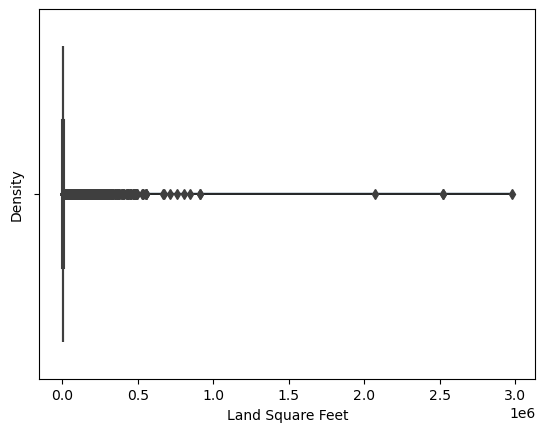

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


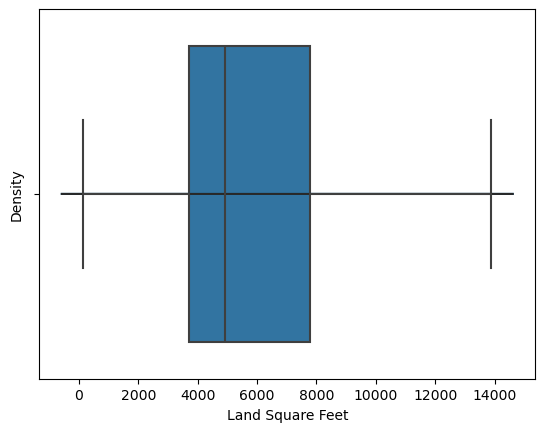



Variable Name: Building Square Feet
mean: 1828.727966256659 
std: 1078.8092081663187
iqe: 1078.0
outliers: 2         7435.0
5         4692.0
8         4287.0
10        4075.0
35        4851.0
           ...  
583275    5205.0
583298    4248.0
583304    4246.0
583349    4609.0
583350    4609.0
Name: Building Square Feet, Length: 20549, dtype: float64
Total number of outliers: 20549


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


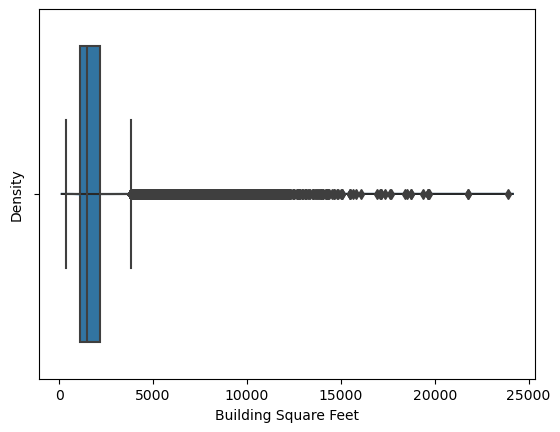

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


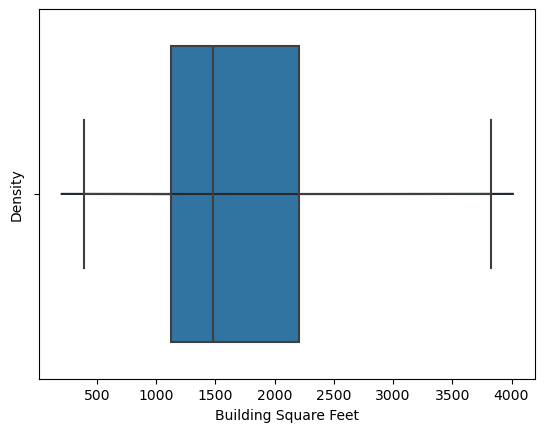



Variable Name: Estimate (Land)
mean: 53289.363630822496 
std: 86810.03555803522
iqe: 29340.0
outliers: 5         271180
8         334800
10        165570
11        113400
63        106250
           ...  
583304    207000
583327    218750
583328    156320
583348    178390
583368    263840
Name: Estimate (Land), Length: 37305, dtype: int64
Total number of outliers: 37305


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


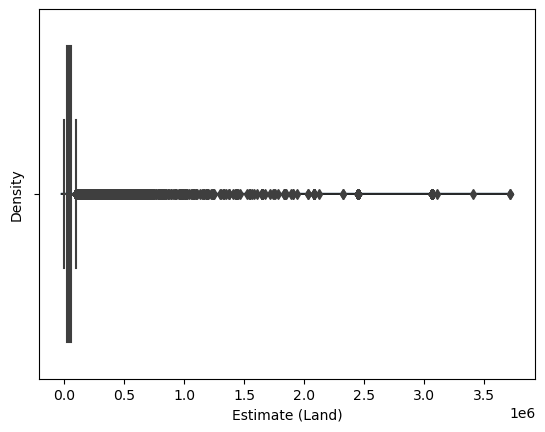

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


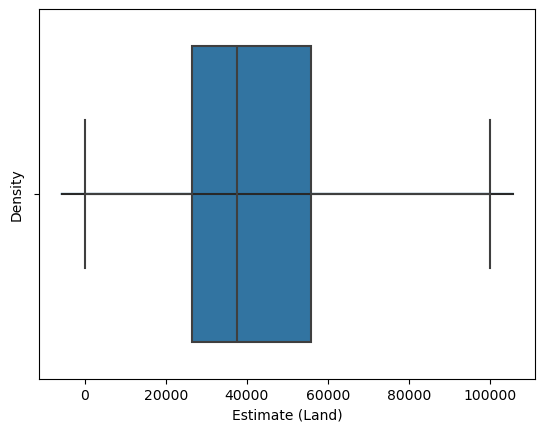



Variable Name: Estimate (Building)
mean: 221705.67863368726 
std: 282247.80939011544
iqe: 150290.0
outliers: 5          677820
8         2529330
10         682440
53         556160
78         486350
           ...   
583327     912050
583328     720770
583329     533640
583348     597490
583368    1136160
Name: Estimate (Building), Length: 27718, dtype: int64
Total number of outliers: 27718


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


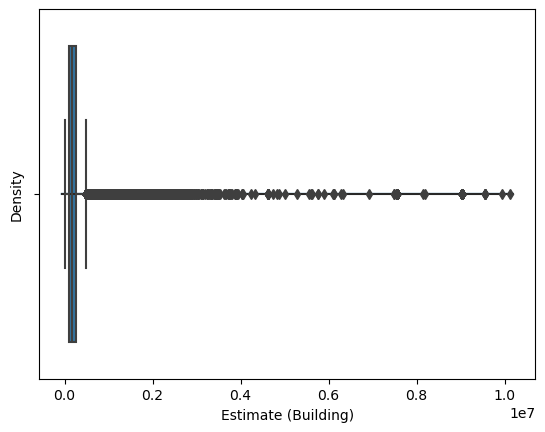

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


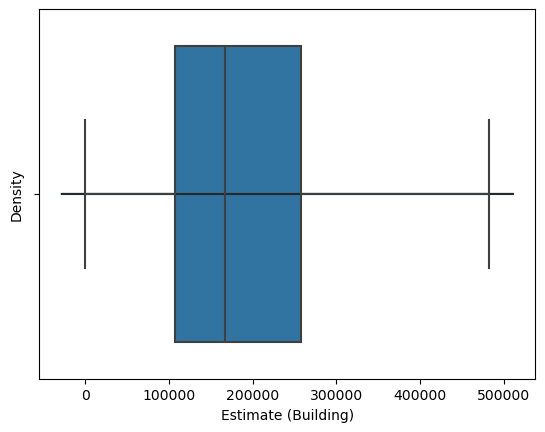



Variable Name: Age
mean: 67.89992319976594 
std: 32.59289034722376
iqe: 45.0
outliers: 28245     172
28938     179
59627     162
96892     163
131909    168
144058    169
176845    166
205991    172
213582    161
258122    164
258716    164
280119    165
282809    167
282922    165
282923    165
290494    164
318814    165
369601    164
373766    162
378542    163
419939    163
421171    165
437978    162
437979    162
456727    181
479922    161
490929    171
504518    161
506090    179
506978    165
507607    161
519685    163
577288    164
577289    164
Name: Age, dtype: int64
Total number of outliers: 34


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


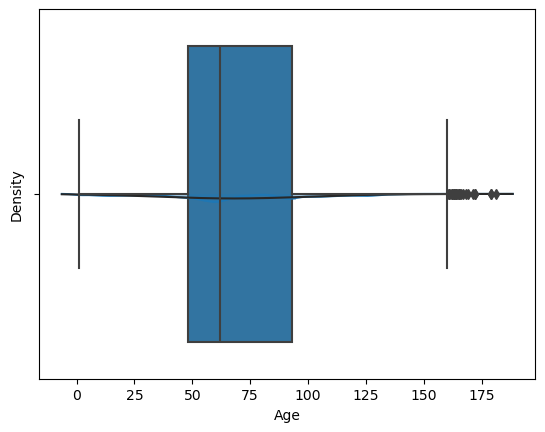

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


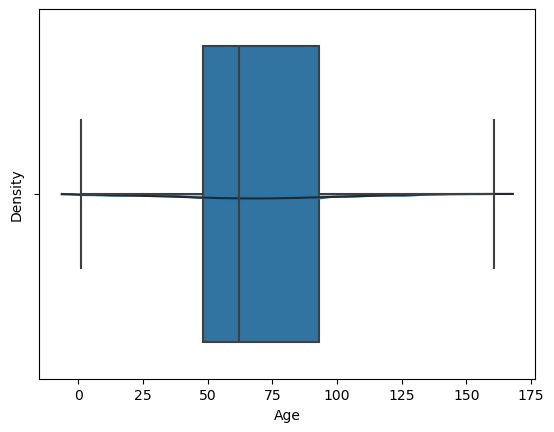



Variable Name: Lot Size Squared
mean: 228840766.15621737 
std: 21238158740.326862
iqe: 46710189.0
outliers: 5         1.149074e+09
9         2.585342e+08
10        4.873763e+10
26        1.360256e+08
90        1.610361e+08
              ...     
583307    3.015085e+08
583330    4.037688e+08
583345    1.385329e+08
583349    2.267735e+08
583350    2.267735e+08
Name: Lot Size Squared, Length: 33374, dtype: float64
Total number of outliers: 33374


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


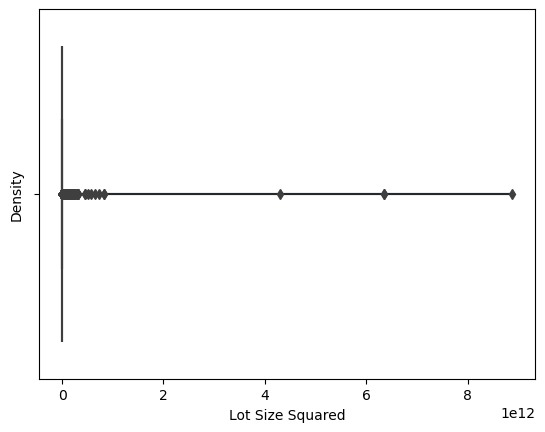

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


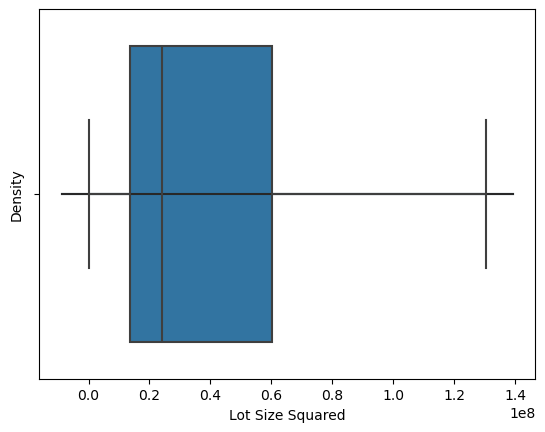



Variable Name: Improvement Size Squared
mean: 4508072.444658726 
std: 8065422.864019072
iqe: 3594052.0
outliers: 2         55279225.0
5         22014864.0
8         18378369.0
10        16605625.0
35        23532201.0
             ...    
583324    11923209.0
583327    13690000.0
583349    21242881.0
583350    21242881.0
583368    10400625.0
Name: Improvement Size Squared, Length: 36036, dtype: float64
Total number of outliers: 36036


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


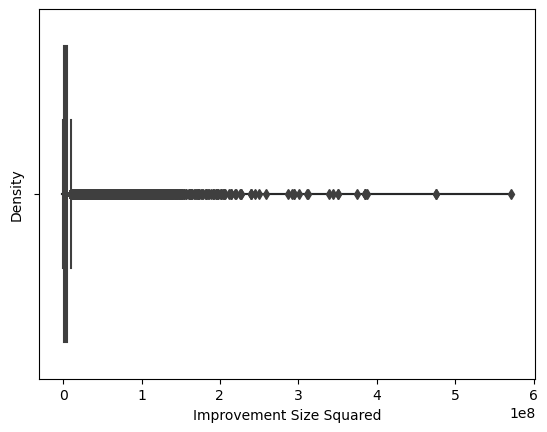

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


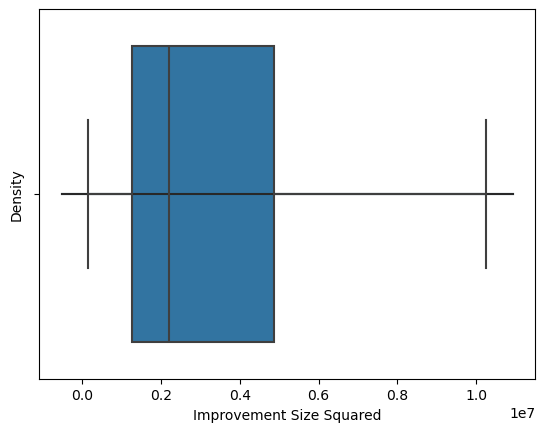



Variable Name: Rooms
mean: 7.174855847179725 
std: 3.51825325979564
iqe: 3.0
outliers: 2         24.0
35        28.0
53        21.0
176       30.0
206       18.0
          ... 
583273    18.0
583274    18.0
583275    18.0
583324    18.0
583327    16.0
Name: Rooms, Length: 21587, dtype: float64
Total number of outliers: 21587


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


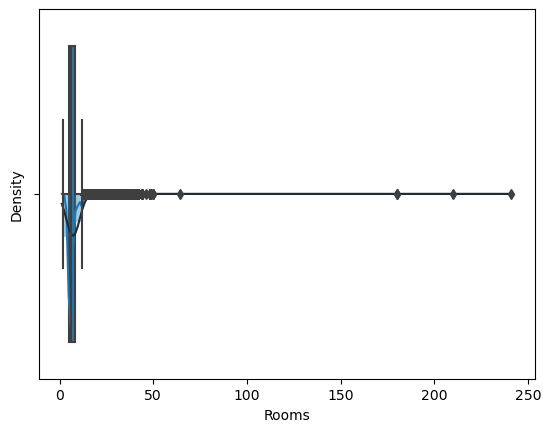

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


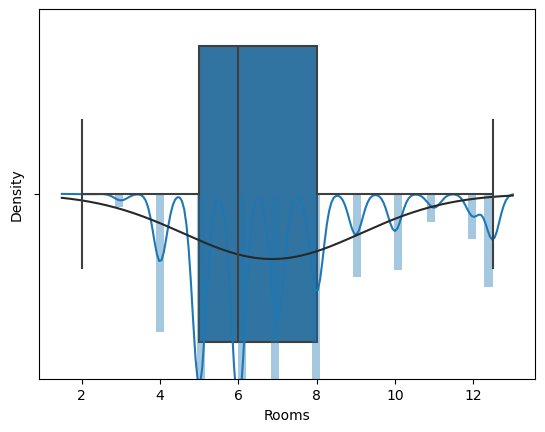



Variable Name: Bedrooms
mean: 3.585405517426339 
std: 1.5972248523159378
iqe: 1.0
outliers: 2         12.0
35        10.0
53        12.0
129        1.0
173        8.0
          ... 
583275     6.0
583276     6.0
583324     9.0
583327     7.0
583368     6.0
Name: Bedrooms, Length: 36239, dtype: float64
Total number of outliers: 36239


C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit=norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


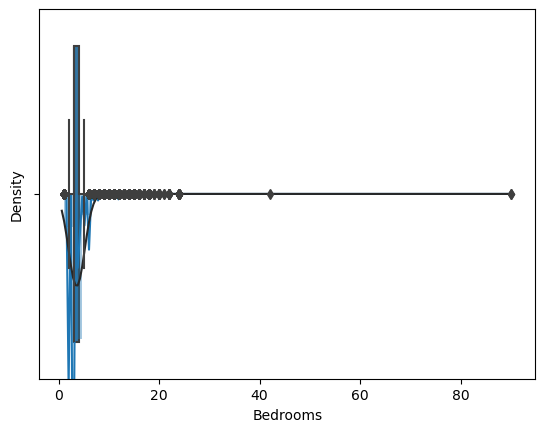

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\3321447986.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp[i], fit = norm)
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Visualization after deleting outliers:


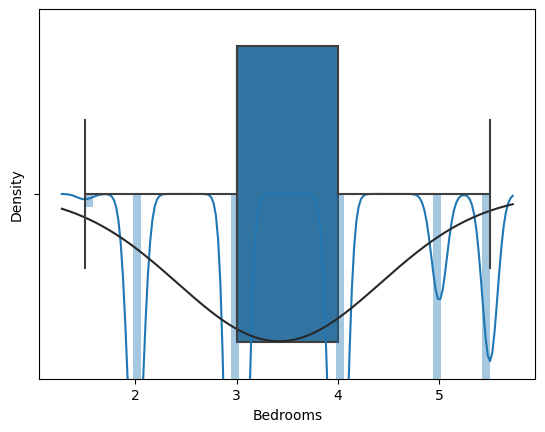

In [37]:
# If there exists outliers, we replace them with upperbound if the value is larger than upperbound, 
# and replace with lower bound if the value is smaller than lower bound and visualize them again.
var = ['Land Square Feet','Building Square Feet','Estimate (Land)','Estimate (Building)',
       'Age','Lot Size Squared','Improvement Size Squared',"Rooms","Bedrooms"]

for i in var:
    temp = RSD
    print("Variable Name:", i)
    print("mean:", temp[i].mean(), "\nstd:", temp[i].std())
    q75, q25 = np.percentile(temp[i].dropna(), [75 ,25])
    iqr = q75 - q25
    print("iqe:", iqr)
    
    lower_bound = q25 - 1.5*iqr
    upper_bound = q75 + 1.5*iqr
    
    outliers = temp[i][(temp[i] < lower_bound) | (temp[i] > upper_bound)]
    print("outliers:", outliers)
    print("Total number of outliers:",len(outliers))
    
    sns.distplot(temp[i], fit=norm)
    sns.boxplot(x=temp[i])
    plt.show()

    if len(outliers) != 0:
        temp[i] = np.clip(temp[i], lower_bound, upper_bound)
        # temp = temp[(temp[i] >= lower_bound) & (temp[i] <= upper_bound)]
        sns.distplot(temp[i], fit = norm)
        sns.boxplot(x=temp[i])
        print("Visualization after deleting outliers:")
        plt.show()
        
    print("\n")

****(4). Encoding****

***4.1 Label Encoding***

In [38]:
# Basement Finish - the smaller the more finished
ord_enco = OrdinalEncoder(categories=[['1', '2', '3']])
RSD['BaseFin'] = ord_enco.fit_transform(RSD.loc[:, ['Basement Finish']])

In [39]:
# Type of attic - 1 = Full, 2 = partial, 3 = none
ord_enco = OrdinalEncoder(categories=[['1', '2', '3']])
RSD['AtcType'] = ord_enco.fit_transform(RSD.loc[:, ['Attic Type']])

In [40]:
# Construction quality - the smaller the better
ord_enco = OrdinalEncoder(categories=[['1', '2', '3']])
RSD['Quality'] = ord_enco.fit_transform(RSD.loc[:, ['Construction Quality']])

In [41]:
# Site desirability - 1 = Beneficial to Value, 2 = Not relevant to Value, 3 = Detracts from Value
ord_enco = OrdinalEncoder(categories=[['1', '2', '3']])
RSD['Quality'] = ord_enco.fit_transform(RSD.loc[:, ['Site Desirability']])

In [42]:
# State of Repair - 1 = Above average, 2 = Average, 3 = Below average
ord_enco = OrdinalEncoder(categories=[['1', '2', '3']])
RSD['Repair'] = ord_enco.fit_transform(RSD.loc[:, ['Repair Condition']])

In [43]:
# Age, binning into groups first, then labeling
bins = [0, 10, 30, 60, 100, float('inf')]
labels = ['New', 'Relatively New', 'Middle-aged', 'Old', 'Very Old']
RSD['Age'] = pd.cut(RSD['Age'], bins=bins, labels=labels, right=False)

ord_enco = OrdinalEncoder(categories=[['New', 'Relatively New', 'Middle-aged', 'Old', 'Very Old']])
RSD['Age'] = ord_enco.fit_transform(RSD.loc[:, ['Age']])

In [44]:
RSD = RSD.drop(columns = ['Basement Finish','Attic Type','Construction Quality','Site Desirability','Repair Condition',])

***4.2 Dummy Encoding***

In [45]:
Address = pd.get_dummies(RSD['Town Code'], 
                         prefix='Code',
                         drop_first=False).astype(int)
Address.head()
RSD = RSD.drop(columns = ['Neighborhood Code','Town Code'])

In [46]:
# Type of residence - 1 = one story, 2 = two-story, 3 = three-story or higher, 4 = split level, 5 = 1.5 story, 6 = 1.6 story
ResType = pd.get_dummies(RSD['Type of Residence'],
                         prefix="ResType",
                         drop_first=False).astype(int)
ResType.head()

,ResType_1.0,ResType_2.0,ResType_3.0,ResType_4.0,ResType_5.0,ResType_6.0,ResType_7.0,ResType_8.0
2,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0


In [47]:
# Exterior Wall material - 1=Wood, 2=Masonry, 3=Wood&Masonry, 4=Stucco
WallMatl = pd.get_dummies(RSD['Wall Material'],
                         prefix="WallMatl",
                         drop_first=False).astype(int)
WallMatl.head()

,WallMatl_1.0,WallMatl_2.0,WallMatl_3.0,WallMatl_4.0
2,0,1,0,0
5,0,1,0,0
8,0,1,0,0
9,0,0,1,0
10,0,1,0,0


In [48]:
# Roof construction material. 1 = Shingle/Asphalt, 2 = Tar & Gravel, 3 = Slate, 4 = Shake, 5 = Tile, 6 = Other
RoofMatl = pd.get_dummies(RSD['Roof Material'],
                         prefix="RoofMatl",
                         drop_first=False).astype(int)
RoofMatl.head()

,RoofMatl_1.0,RoofMatl_2.0,RoofMatl_3.0,RoofMatl_4.0,RoofMatl_5.0,RoofMatl_6.0
2,0,1,0,0,0,0
5,0,0,0,1,0,0
8,0,0,0,0,0,1
9,1,0,0,0,0,0
10,0,0,0,1,0,0


In [49]:
# Basement: type - 1 = Full, 2 = Slab, 3 = Partial, 4 = Crawl
BaseType = pd.get_dummies(RSD['Basement'],
                         prefix="BaseType",
                         drop_first=False).astype(int)
BaseType.head()

,BaseType_1.0,BaseType_2.0,BaseType_3.0,BaseType_4.0
2,1,0,0,0
5,1,0,0,0
8,1,0,0,0
9,1,0,0,0
10,0,0,1,0


In [50]:
# Central heating type - 1 = Warm air, 2 = Hot water steam, 3 = Electric, 4 = Other
CH = pd.get_dummies(RSD['Central Heating'],
                         prefix="CH",
                         drop_first=False).astype(int)
CH.head()

,CH_1.0,CH_2.0
2,0,1
5,1,0
8,1,0
9,1,0
10,1,0


In [51]:
# Other heating type - 1 = Floor furnace, 2 = Unit heater, 3 = Stove, 4 = Solar, 5 = none
OH = pd.get_dummies(RSD['Other Heating'],
                         prefix="OH",
                         drop_first=False).astype(int)
OH.head()

,OH_2.0,OH_5.0
2,0,1
5,0,1
8,0,1
9,0,1
10,0,1


In [52]:
# Is central airconditioning present? - yes or no
CtrlAir = pd.get_dummies(RSD['Central Air'],
                         prefix="CtrlAir",
                         drop_first=False).astype(int)
CtrlAir.head()

,CtrlAir_0.0,CtrlAir_1.0
2,1,0
5,0,1
8,0,1
9,0,1
10,0,1


In [53]:
# Enclosed porch - 1 = Frame, 2 = Masonry, 3 = None
Pch = pd.get_dummies(RSD['Porch'],
                         prefix="Pch",
                         drop_first=False).astype(int)
Pch.head()

,Pch_1,Pch_2,Pch_3
2,0,0,1
5,0,0,1
8,0,0,1
9,0,0,1
10,0,0,1


In [54]:
# Multi Property Indicator - Indicator for a property with multiple improvements on one PIN
MultiProp = pd.get_dummies(RSD['Multi Property Indicator'],
                         prefix="MultiProp",
                         drop_first=False).astype(int)
MultiProp.head()

,MultiProp_0,MultiProp_1
2,1,0
5,1,0
8,1,0
9,1,0
10,1,0


In [55]:
# Modeling group - defined by the property class
Group = pd.get_dummies(RSD['Modeling Group'],
                         prefix="Group",
                         drop_first=False).astype(int)
Group.head()

,Group_MF,Group_SF
2,1,0
5,0,1
8,0,1
9,0,1
10,0,1


In [56]:
# Use, Use of property - 1 = single family, 2 = multi-family
UseFamily = pd.get_dummies(RSD['Use'],
                         prefix="UseFamily",
                         drop_first=False).astype(int)
UseFamily.head()

,UseFamily_1,UseFamily_2
2,0,1
5,1,0
8,1,0
9,1,0
10,1,0


In [57]:
# O'Hare Noise- Indicator for the property under O'Hare approach flight path, within 1/4 mile.
Noise = pd.get_dummies(RSD['O\'Hare Noise'],
                         prefix="Noise",
                         drop_first=False).astype(int)
Noise.head()

,Noise_0.0,Noise_1.0
2,1,0
5,1,0
8,1,0
9,1,0
10,1,0


In [58]:
# Floodplain - Indicator for properties on a floodplain
Flood = pd.get_dummies(RSD['Floodplain'],
                         prefix="Flood",
                         drop_first=False).astype(int)
Flood.head()

,Flood_0.0,Flood_1.0
2,1,0
5,1,0
8,1,0
9,1,0
10,1,0


In [59]:
# Road Proximity - Indicates whether the property is within 300 ft of a major road.
Road = pd.get_dummies(RSD['Road Proximity'],
                         prefix="Road",
                         drop_first=False).astype(int)
Road.head()

,Road_0.0,Road_1.0
2,1,0
5,0,1
8,1,0
9,1,0
10,0,1


In [60]:
# Sale Quarter
Qtr = pd.get_dummies(RSD['Sale Quarter of Year'],
                         prefix="Qtr",
                         drop_first=False).astype(int)
Qtr.head()

,Qtr_1,Qtr_2,Qtr_3,Qtr_4
2,0,0,0,1
5,0,0,1,0
8,1,0,0,0
9,0,1,0,0
10,0,0,1,0


In [61]:
# Pure Market Filter - Indicator for pure market sale
Mkt = pd.get_dummies(RSD['Pure Market Filter'],
                         prefix="Mkt",
                         drop_first=False).astype(int)
Mkt.head()

,Mkt_0,Mkt_1
2,0,1
5,0,1
8,0,1
9,0,1
10,1,0


In [62]:
RSD_enco = pd.concat([RSD,Address,ResType,WallMatl,RoofMatl,BaseType,CH,OH,CtrlAir,Pch,MultiProp,Group,UseFamily,Noise,Flood,Road,Qtr,Mkt], axis=1)
RSD_clean = RSD_enco.drop(columns = ['Type of Residence','Wall Material','Roof Material','Basement','Central Heating','Other Heating',
                                    'Central Air','Porch','Multi Property Indicator','Modeling Group','Use','O\'Hare Noise','Floodplain',
                                    'Road Proximity','Sale Quarter of Year','Pure Market Filter'])

In [63]:
RSD_clean.shape

(410155, 110)

In [64]:
RSD_clean.to_csv('RSD_cleaned.csv', index=False)

****(5). Merge two dataset to solve the problem with the sale price****

In [65]:
path = "Residential_Assessments.csv"
assess = pd.read_table(path, sep=',')

C:\Users\lesha\AppData\Local\Temp\ipykernel_11184\2484519435.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  assess = pd.read_table(path, sep=',')


In [66]:
assess.shape

(7884847, 14)

In [67]:
assess = assess.drop_duplicates(keep='last')

In [68]:
assess = assess[['PIN', 'CERTIFIED']]

In [69]:
assess.describe()

,PIN,CERTIFIED
count,7.884847e+06,7.884847e+06
mean,1.626489e+13,2.409401e+05
std,7.620245e+12,2.501749e+05
min,1.011000e+12,0.000000e+00
25%,1.131203e+13,1.086900e+05
50%,1.613407e+13,1.849400e+05
75%,2.029201e+13,2.962500e+05
max,3.332302e+13,2.900119e+07


In [70]:
median_certified= assess['CERTIFIED'].median()
print(f"Median of column CERTIFIED: {median_certified}")

Median of column CERTIFIED: 184940.0


In [71]:
Assess = assess.groupby('PIN')['CERTIFIED'].mean().reset_index()

In [72]:
Assess.describe()

,PIN,CERTIFIED
count,1.595459e+06,1.595459e+06
mean,1.625120e+13,2.421468e+05
std,7.610291e+12,2.524287e+05
min,1.011000e+12,0.000000e+00
25%,1.131209e+13,1.096260e+05
50%,1.613323e+13,1.855860e+05
75%,2.028119e+13,2.960810e+05
max,3.332302e+13,2.760233e+07


In [73]:
duplicate_count = Assess.duplicated().sum()
print(f"number of duplicate rows: {duplicate_count}")

number of duplicate rows: 0


In [74]:
merged_df = pd.merge(RSD_clean, Assess, on='PIN', how='inner')

In [75]:
merged_df.shape

(408964, 111)

In [76]:
zero_price_count = (merged_df['CERTIFIED'] < 10000).sum()

print(f"number of rows in variable Price equal to 0: {zero_price_count}")

number of rows in variable Price equal to 0: 10


In [77]:
zero_price_rows = merged_df[merged_df['CERTIFIED'] == 0]

print(zero_price_rows)

                   PIN  Land Square Feet  Apartments  Rooms  Bedrooms  \
110931   6202020350000           13882.5         0.0    8.0       4.0   
214816  12304010130000           12120.0         2.0    8.0       4.0   
268729  20243270250000            6700.0         0.0    9.0       4.0   
335961  16043010060000            3750.0         4.0   12.5       5.5   
349666  25293310030000            4375.0         0.0    6.0       3.0   
382101  13011010190000            4092.0         3.0   12.5       5.5   
396286   3064000100000           13073.0         0.0   10.0       4.0   
396287   3064000100000           13073.0         0.0   10.0       4.0   
401838  16051170120000            6187.0         0.0    8.0       5.0   
401986  12321100090000            8000.0         0.0    6.0       4.0   

        Fireplaces  Half Baths  Garage 2 Size  Building Square Feet  \
110931         1.0         0.0            0.0                2395.0   
214816         0.0         0.0            0.0         

In [78]:
merged_df= merged_df[(merged_df['CERTIFIED'] >10000)] #Get rid of whole line

In [79]:
merged_df.shape

(408954, 111)

In [80]:
merged_df = merged_df.drop('Sale Price', axis=1)
merged_df = merged_df.drop('PIN', axis=1)

In [81]:
corr_matrix = merged_df.corr()
print(corr_matrix)

                  Land Square Feet  Apartments     Rooms  Bedrooms  \
Land Square Feet          1.000000   -0.222485  0.055495  0.106553   
Apartments               -0.222485    1.000000  0.656923  0.572255   
Rooms                     0.055495    0.656923  1.000000  0.858678   
Bedrooms                  0.106553    0.572255  0.858678  1.000000   
Fireplaces                0.371372   -0.159763  0.185842  0.175021   
...                            ...         ...       ...       ...   
Qtr_3                     0.024740   -0.021940 -0.001492 -0.000707   
Qtr_4                    -0.004108    0.011683 -0.000800 -0.002032   
Mkt_0                    -0.109120    0.093658  0.051262  0.049247   
Mkt_1                     0.109120   -0.093658 -0.051262 -0.049247   
CERTIFIED                 0.083956    0.057166  0.252195  0.221586   

                  Fireplaces  Half Baths  Garage 2 Size  Building Square Feet  \
Land Square Feet    0.371372    0.221464       0.021479              0.175900 

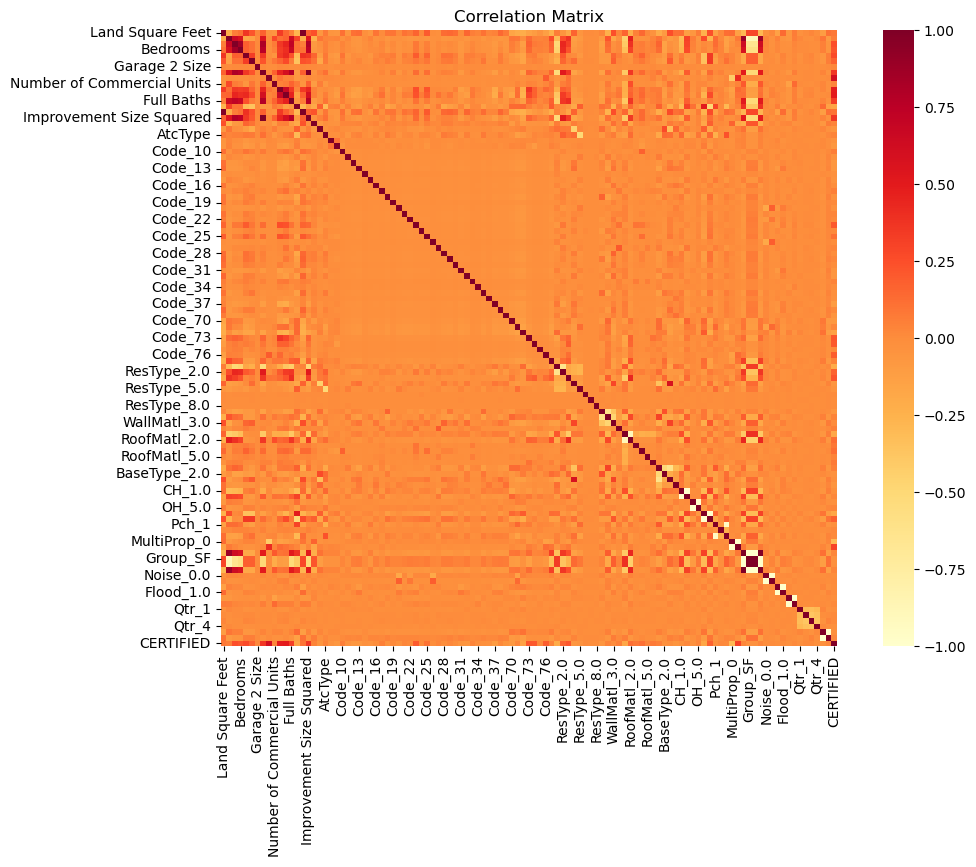

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='YlOrRd', square=True)
plt.title('Correlation Matrix')
plt.show()

In [83]:
merged_df[["Rooms","Bedrooms", "Full Baths","Half Baths","Fireplaces","Building Square Feet","MultiProp_1","CERTIFIED"]].describe().round(3)

,Rooms,Bedrooms,Full Baths,Half Baths,Fireplaces,Building Square Feet,MultiProp_1,CERTIFIED
count,408954.000,408954.000,408954.000,408954.000,408954.000,408954.000,408954.000,4.089540e+05
mean,6.859,3.418,1.706,0.443,0.299,1760.299,0.019,3.048975e+05
std,2.263,1.000,0.934,0.568,0.536,827.109,0.138,4.232243e+05
min,2.000,1.500,1.000,0.000,0.000,391.000,0.000,1.095600e+04
25%,5.000,3.000,1.000,0.000,0.000,1128.000,0.000,1.445820e+05
50%,6.000,3.000,1.000,0.000,0.000,1482.000,0.000,2.177280e+05
75%,8.000,4.000,2.000,1.000,1.000,2205.000,0.000,3.379280e+05
max,12.500,5.500,12.000,9.000,2.000,3823.000,1.000,2.415701e+07


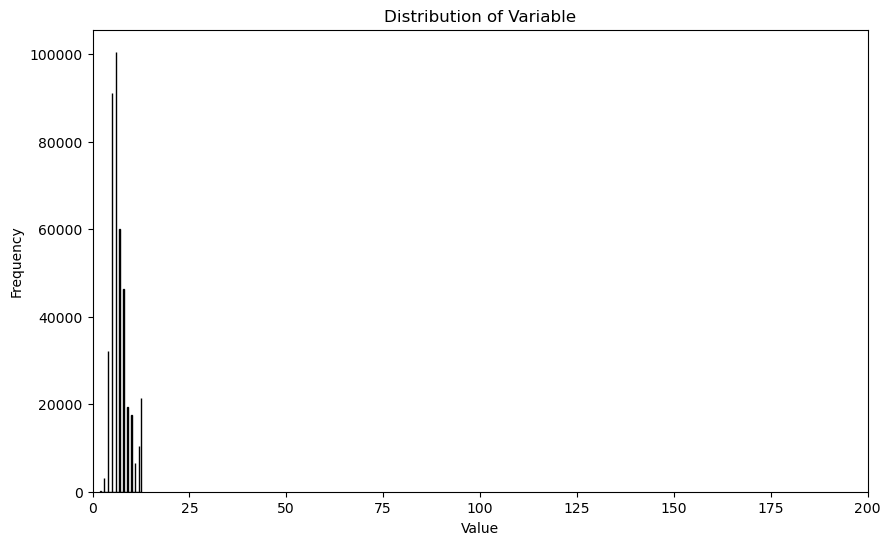

In [84]:
# descriptive visualization for some variables that are considered important for predicting price (both from literature and correlation matrix)
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Rooms'], bins=100, edgecolor='black')
plt.title('Distribution of Variable')
plt.xlabel('Value')
plt.xlim(0,200)
plt.ylabel('Frequency')
plt.show()

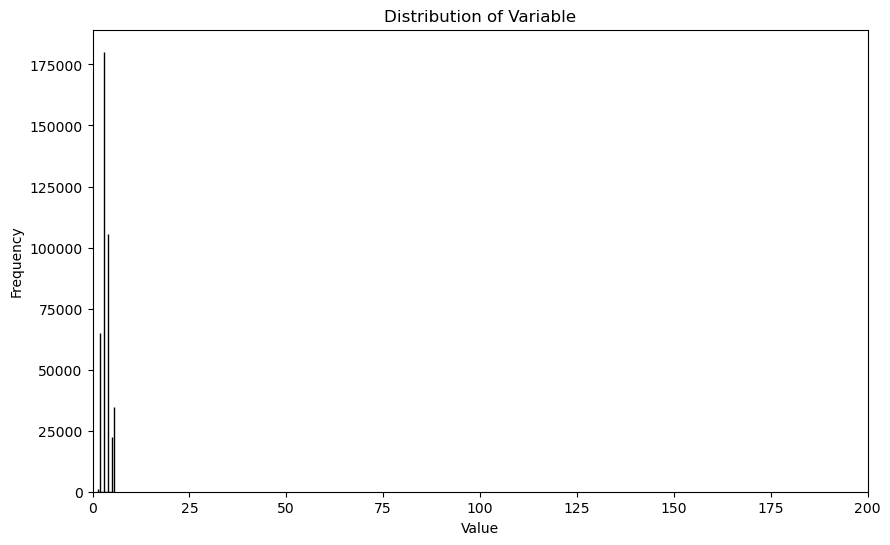

In [85]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Bedrooms'], bins=100, edgecolor='black')
plt.title('Distribution of Variable')
plt.xlabel('Value')
plt.xlim(0,200)
plt.ylabel('Frequency')
plt.show()

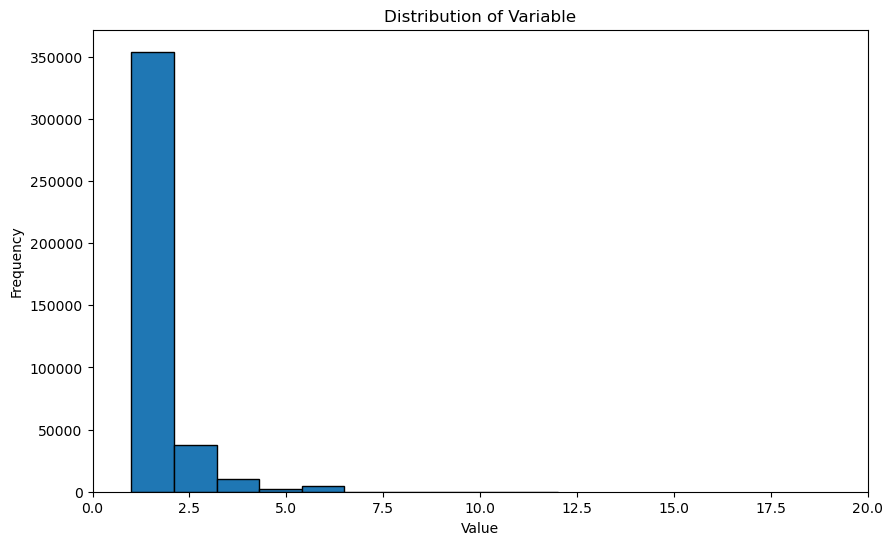

In [86]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['Full Baths'], bins=10, edgecolor='black')
plt.title('Distribution of Variable')
plt.xlabel('Value')
plt.xlim(0,20)
plt.ylabel('Frequency')
plt.show()

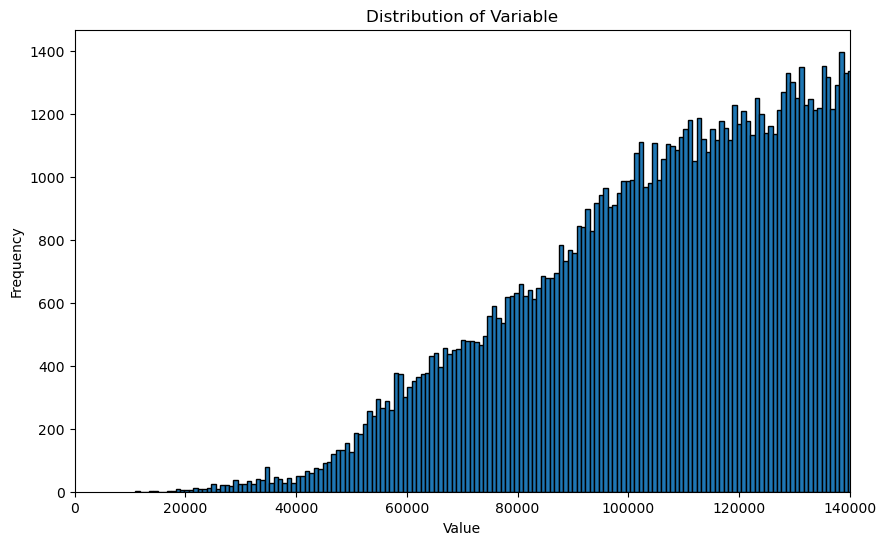

In [87]:
plt.figure(figsize=(10, 6))
plt.hist(merged_df['CERTIFIED'], bins=30000, edgecolor='black')
plt.title('Distribution of Variable')
plt.xlabel('Value')
plt.xlim(0,140000)
plt.ylabel('Frequency')
plt.show()

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price+1)'}>]], dtype=object)

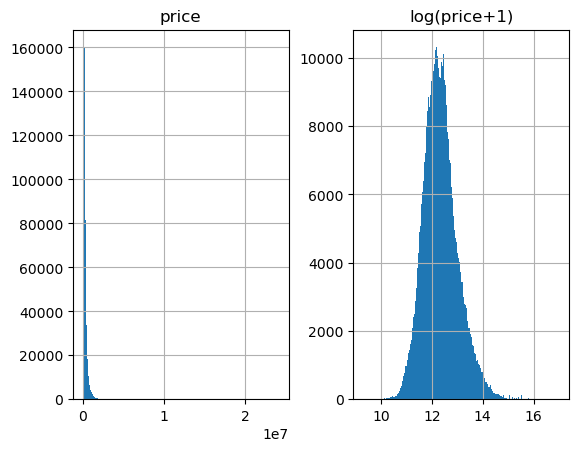

In [88]:
%matplotlib inline
prices=pd.DataFrame({"price":merged_df["CERTIFIED"],"log(price+1)":np.log1p(merged_df["CERTIFIED"])})
prices.hist(bins=200)

In [89]:
merged_df.to_csv('merged_df.csv', index=False)

In [90]:
merged_df.shape

(408954, 109)

In [91]:
merged_df.describe()

,Land Square Feet,Apartments,Rooms,Bedrooms,Fireplaces,Half Baths,Garage 2 Size,Building Square Feet,Multi Code,Number of Commercial Units,...,Flood_1.0,Road_0.0,Road_1.0,Qtr_1,Qtr_2,Qtr_3,Qtr_4,Mkt_0,Mkt_1,CERTIFIED
count,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,...,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,408954.000000,4.089540e+05
mean,5932.244166,0.441649,6.858841,3.417840,0.299207,0.442996,0.000885,1760.298823,1.033625,0.012615,...,0.022482,0.922737,0.077263,0.211990,0.262550,0.284100,0.241360,0.196218,0.803782,3.048975e+05
std,3215.291903,1.096142,2.263274,0.999641,0.536073,0.567646,0.041141,827.108839,0.462968,0.127499,...,0.148244,0.267009,0.267009,0.408718,0.440021,0.450985,0.427908,0.397136,0.397136,4.232243e+05
min,149.000000,0.000000,2.000000,1.500000,0.000000,0.000000,0.000000,391.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.095600e+04
25%,3690.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,1128.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.445820e+05
50%,4940.000000,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,1482.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.177280e+05
75%,7774.000000,0.000000,8.000000,4.000000,1.000000,1.000000,0.000000,2205.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.379280e+05
max,13882.500000,6.000000,12.500000,5.500000,2.000000,9.000000,3.500000,3823.000000,27.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.415701e+07


In [92]:
test = merged_df.loc[:, ~merged_df.columns.str.startswith('Code_')]
print(test.shape)

(408954, 71)
